    - [x] dim user (rfm segment) for checkout flow
    - seems there is no relationship between user flag and checkout page changes
- [x] rate reverse flow
- [ ] rate unfinished checkout
- [x] time spent for each page
    - [ ] change add/remove item, add/remove shipment, time scope change
- [ ] drop vs go to prev page
- [ ] cat, price, quantity dim for reverse flow
    - [x] dim app/web
- [ ] ga -> page bounce rate
- [ ] see data for longer time, maybe a week
- [x] decorator get from db cache

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from db import DB

In [2]:
db = DB()

In [3]:
start_date = '2023-08-03 00:00:00'
funnel_steps_logs = db.get_funnel_steps_log(start_date)
user_data = db.get_user_data(start_date)
cart_data = db.get_cart_data(start_date)

In [4]:
funnel_steps_logs

,cart_id,changed_at,funnel_step
763423,23964016,2023-08-04 13:14:09,"""shipping"""
763152,23964016,2023-08-04 13:14:28,"""cart"""
760719,23964016,2023-08-04 13:17:24,"""shipping"""
757630,23964016,2023-08-04 13:21:04,"""payment"""
757461,23964016,2023-08-04 13:21:15,"""checkout"""
...,...,...,...
34,344276112,2023-08-05 12:17:36,"""cart"""
32,344276113,2023-08-05 12:17:37,"""cart"""
14,344276114,2023-08-05 12:17:38,"""cart"""
10,344276115,2023-08-05 12:17:38,"""cart"""


In [5]:
user_data

,cart_id,user_id,gender,foreigner,customer_type,customer_clustering_rate,user_category
0,343940038,49107289,male,0,normal,NaN,None
1,343940046,31344449,male,0,normal,7.47,Potential Loyalist
2,343940052,31299366,None,0,normal,NaN,Promising
3,343940048,12273735,female,0,normal,8.16,Champion
4,343940049,58568544,None,0,new,NaN,None
...,...,...,...,...,...,...,...
228202,344276402,6980452,male,0,normal,6.77,Loyal
228203,344276404,45799510,male,0,normal,7.75,Need Attention
228204,344276407,43078550,male,0,normal,8.35,Loyal
228205,344276408,35870651,None,0,normal,6.37,Potential Loyalist


In [6]:
cart_data

,id,status,payable_price,source,source_close
0,343940046,open,4900700,android,None
1,343940047,open,17230000,web,None
2,343940052,open,1789900,android,None
3,343940048,open,3180000,android,None
4,343940049,open,0,mobile,None
...,...,...,...,...,...
311657,344276413,open,0,android,None
311658,344276414,open,0,web,None
311659,344276415,open,0,mobile,None
311660,344276416,open,0,web,None


## checkout flow

In [7]:
df2 = funnel_steps_logs.groupby('cart_id')['funnel_step'].apply(lambda x: '->'.join(x)).reset_index()
df2 = df2.groupby('funnel_step').count().reset_index()
df2.rename(columns={'cart_id': "count"}, inplace=True)
df2.sort_values(by="count", ascending=False, inplace=True)
df2["number_of_steps"] = df2["funnel_step"].apply(lambda x: len(x.split("->")))
df2['percentage'] = df2['count'] / df2['count'].sum() * 100

In [8]:
df2.head(30)

,funnel_step,count,number_of_steps,percentage
0,"""cart""",269308,1,45.169763
2334,"""cart""->""shipping""->""payment""->""checkout""",71132,4,11.930636
5311,"""shipping""->""payment""->""checkout""",43932,3,7.368508
3166,"""shipping""->""cart""",20743,2,3.479126
3165,"""shipping""",18026,1,3.023416
154,"""cart""->""shipping""->""cart""",17799,3,2.985342
153,"""cart""->""shipping""",17270,2,2.896616
1453,"""cart""->""shipping""->""cart""->""shipping""->""payme...",15179,6,2.545902
4566,"""shipping""->""cart""->""shipping""->""payment""->""ch...",15006,5,2.516886
4183,"""shipping""->""cart""->""shipping""->""cart""->""shipp...",5291,7,0.887435


## checkout page changes

In [9]:
df3 = funnel_steps_logs.copy()
df3['previous_step'] = df3.groupby('cart_id')['funnel_step'].shift(1)
df3.dropna(inplace=True)
df3['funnel_step_change'] = df3['previous_step'] + '->' + df3['funnel_step']

In [10]:
df4 = df3.copy()
df4 = df4.groupby(by='funnel_step_change').count().reset_index()[['funnel_step_change', 'cart_id']]
df4.rename(columns={'cart_id': 'count'}, inplace=True)
df4.sort_values(by='count', ascending=False, inplace=True)
df4['percentage'] = df4['count'] / df4['count'].sum() * 100

In [11]:
df4

,funnel_step_change,count,percentage
3,"""cart""->""shipping""",397590,33.205524
14,"""shipping""->""payment""",269878,22.539401
12,"""shipping""->""cart""",256795,21.446748
9,"""payment""->""checkout""",195532,16.330246
8,"""payment""->""cart""",36034,3.009452
11,"""payment""->""shipping""",31470,2.628280
15,"""shipping""->""shipping""",3386,0.282789
0,"""cart""->""cart""",3103,0.259153
2,"""cart""->""payment""",2406,0.200942
13,"""shipping""->""checkout""",524,0.043763


In [12]:
df7 = df3.copy()
df7.rename(columns={"previous_step": "cur_page", "funnel_step": "next_page"}, inplace=True)
grouped_df7 = df7.groupby(["cur_page", "next_page"])['cart_id'].count().reset_index()
grouped_df7.rename(columns={"cart_id": "count"}, inplace=True)
grouped_df7.sort_values(by=['cur_page', 'next_page', 'count'], ascending=False, inplace=True)
grouped_df7['percentage'] = grouped_df7['count'] / grouped_df7.groupby('cur_page')['count'].transform('sum') * 100

In [13]:
grouped_df7.pivot(index='cur_page', columns='next_page', values='percentage').fillna(0)

next_page,"""cart""","""checkout""","""payment""","""shipping"""
cur_page,,,,
"""cart""",0.769265,0.067679,0.596472,98.566584
"""checkout""",1.023891,1.365188,89.761092,7.849829
"""payment""",13.695256,74.314838,0.029265,11.960640
"""shipping""",48.398648,0.098759,50.864426,0.638166


## adding dimensions to check out page changes

In [14]:
df5 = pd.merge(left=df3, right=user_data, how='inner', on='cart_id')
df5 = df5.groupby(by=['funnel_step_change', 'user_category']).count().reset_index()[
    ['user_category', 'funnel_step_change', 'cart_id']]
df5.rename(columns={'cart_id': 'count'}, inplace=True)
df5.sort_values(by=['user_category', 'count'], ascending=False, inplace=True)
df5['percentage'] = df5['count'] / df5.groupby('user_category')['count'].transform('sum') * 100

In [15]:
df5.pivot(index='funnel_step_change', columns='user_category', values='percentage').fillna(0)

user_category,About To Sleep,At Risk,Cannot Lose Them,Champion,Hibernating,Lost Customers,Loyal,Need Attention,New Customers\r\n,Potential Loyalist,Promising
funnel_step_change,,,,,,,,,,,
"""cart""->""cart""",0.366507,0.239645,0.127603,0.120067,0.305356,0.547823,0.154439,0.234693,0.207518,0.190085,0.213085
"""cart""->""checkout""",0.000000,0.042922,0.023201,0.048622,0.010621,0.002621,0.013184,0.000000,0.000000,0.003802,0.000000
"""cart""->""payment""",0.140964,0.185993,0.185604,0.128005,0.262871,0.338130,0.125246,0.222810,0.166014,0.133060,0.125914
"""cart""->""shipping""",38.370454,38.657987,38.860855,37.911428,38.522610,39.105135,38.703845,38.768902,38.420491,39.054897,38.936510
"""checkout""->""cart""",0.000000,0.000000,0.000000,0.000992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"""checkout""->""payment""",0.000000,0.082266,0.005800,0.171666,0.002655,0.007863,0.016951,0.017825,0.017787,0.003802,0.019371
"""checkout""->""shipping""",0.000000,0.000000,0.000000,0.007938,0.000000,0.005242,0.000000,0.002971,0.000000,0.000000,0.000000
"""payment""->""cart""",2.762898,2.346377,2.337451,2.519424,2.623404,2.335456,2.761063,2.679659,3.053480,2.741028,3.036467
"""payment""->""checkout""",18.494502,17.665784,16.878371,17.829465,17.609729,17.291814,16.662429,17.144470,17.016483,17.119069,16.625502


## time spend on each page

In [16]:
df6 = funnel_steps_logs.copy()
df6['page'] = df6.groupby('cart_id')['funnel_step'].shift(1)
df6['prev_changed_at'] = df6.groupby('cart_id')['changed_at'].shift(1)
df6.dropna(inplace=True)
df6['minutes_spent'] = (df6['changed_at'] - df6['prev_changed_at']).dt.total_seconds() / 60

<AxesSubplot: ylabel='Frequency'>

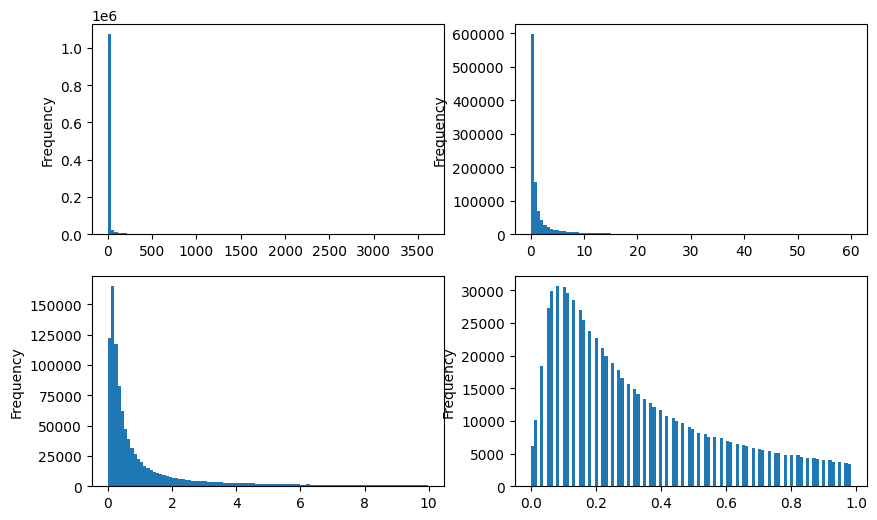

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
df6['minutes_spent'].plot(kind='hist', bins=100, ax=axs[0][0])
df6[df6['minutes_spent'] < 60]['minutes_spent'].plot(kind='hist', bins=100, ax=axs[0][1])
df6[df6['minutes_spent'] < 10]['minutes_spent'].plot(kind='hist', bins=100, ax=axs[1][0])
df6[df6['minutes_spent'] < 1]['minutes_spent'].plot(kind='hist', bins=100, ax=axs[1][1])

<AxesSubplot: ylabel='Frequency'>

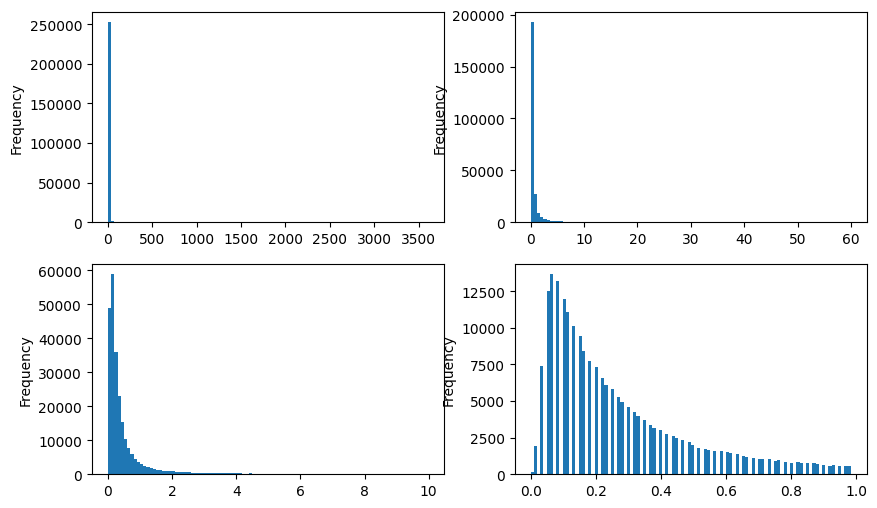

In [18]:
page = '"payment"'
fig4, axs = plt.subplots(2, 2, figsize=(10,6))
df6[df6['page']==page]['minutes_spent'].plot(kind='hist', bins=100, ax=axs[0][0])
df6[(df6['minutes_spent'] < 60)&(df6['page']==page)]['minutes_spent'].plot(kind='hist', bins=100, ax=axs[0][1])
df6[(df6['minutes_spent'] < 10)&(df6['page']==page)]['minutes_spent'].plot(kind='hist', bins=100, ax=axs[1][0])
df6[(df6['minutes_spent'] < 1)&(df6['page']==page)]['minutes_spent'].plot(kind='hist', bins=100, ax=axs[1][1])

In [19]:
df6[df6['minutes_spent'] < 1].count() / df6.count() # 67%
df6[df6['minutes_spent'] < 5].count() / df6.count() # 84%
df6[df6['minutes_spent'] < 10].count() / df6.count() # 88%
df6[df6['minutes_spent'] < 60].count() / df6.count() # 94%

cart_id            0.909976
changed_at         0.909976
funnel_step        0.909976
page               0.909976
prev_changed_at    0.909976
minutes_spent      0.909976
dtype: float64

In [20]:
def time_flag(minute: float) -> str:
    if minute <= 1:
        return 'less than a minute'
    if minute <= 5:
        return 'between 1 and 5 minutes'
    return 'more than 5 minutes'

df6['time_flag'] = df6['minutes_spent'].apply(lambda x: time_flag(x))
df6.rename(columns={"funnel_step": "target_page"}, inplace=True)

In [21]:
grouped_df6 = df6.groupby(["page", "time_flag", "target_page"])['cart_id'].count().reset_index()
grouped_df6.rename(columns={"cart_id": "count"}, inplace=True)
grouped_df6.sort_values(by=['page', 'target_page', 'count'], ascending=False, inplace=True)
grouped_df6['percentage'] = grouped_df6['count'] / grouped_df6.groupby('page')['count'].transform('sum') * 100

In [22]:
grouped_df6.pivot(index=['page', 'target_page'], columns='time_flag', values='percentage').fillna(0)

time_flag               between 1 and 5 minutes  less than a minute  \
page       target_page                                                
"cart"     "cart"                      0.095693            0.583580   
           "checkout"                  0.019585            0.028758   
           "payment"                   0.142300            0.397152   
           "shipping"                 18.432117           47.868717   
"checkout" "cart"                      0.000000            0.341297   
           "checkout"                  0.000000            1.365188   
           "payment"                   0.000000           89.761092   
           "shipping"                  0.000000            7.849829   
"payment"  "cart"                      2.639170            5.209929   
           "checkout"                  4.645913           69.016354   
           "payment"                   0.001140            0.027745   
           "shipping"                  3.167460            7.397962   
"shipping" "cart"                     11.239146           21.862743   
           "checkout"                  0.006973            0.087451   
           "payment"                  12.420677           35.551648   
           "shipping"                  0.154924            0.415015   

time_flag               more than 5 minutes  
page       target_page                       
"cart"     "cart"                  0.089991  
           "checkout"              0.019337  
           "payment"               0.057019  
           "shipping"             32.265750  
"checkout" "cart"                  0.682594  
           "checkout"              0.000000  
           "payment"               0.000000  
           "shipping"              0.000000  
"payment"  "cart"                  5.846157  
           "checkout"              0.652571  
           "payment"               0.000380  
           "shipping"              1.395218  
"shipping" "cart"                 15.296758  
           "checkout"              0.004335  
           "payment"               2.892102  
           "shipping"              0.068227

## web vs app

<AxesSubplot: ylabel='source_close'>

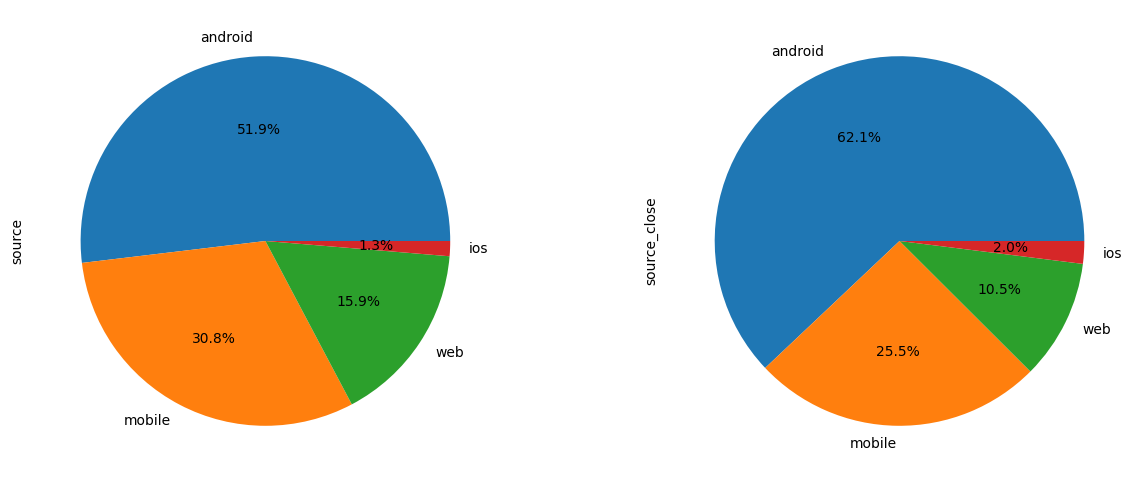

In [23]:
fig2, axs = plt.subplots(1, 2, figsize=(15,6))
source = cart_data['source'].value_counts()
source.plot(kind='pie', autopct='%1.1f%%', ax=axs[0])
source_close = cart_data['source_close'].value_counts()
source_close.plot(kind='pie', autopct='%1.1f%%', ax=axs[1])

<AxesSubplot: ylabel='Frequency'>

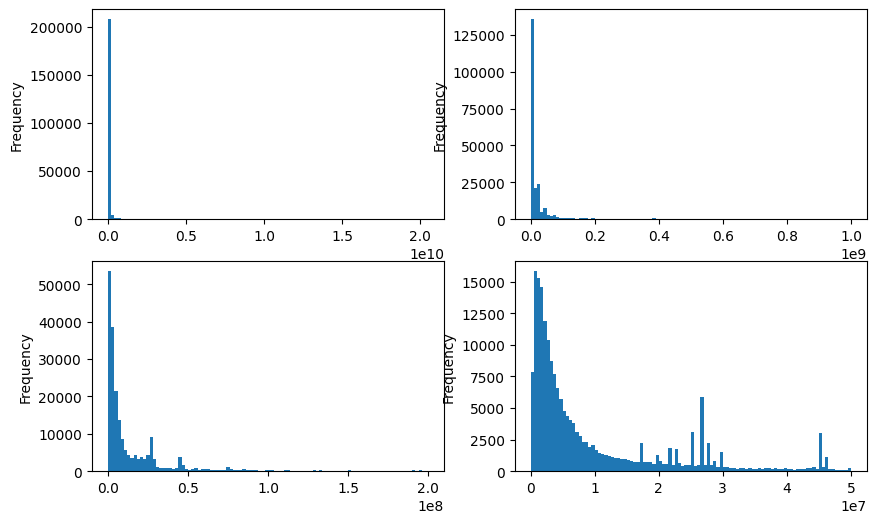

In [24]:
fig3, axs = plt.subplots(2, 2, figsize=(10,6))

df8 = cart_data[cart_data['payable_price']>0]

df8['payable_price'].plot(kind='hist', bins=100, ax=axs[0][0])
df8[df8['payable_price'] < 1000000000]['payable_price'].plot(kind='hist', bins=100, ax=axs[0][1])
df8[df8['payable_price'] < 200000000]['payable_price'].plot(kind='hist', bins=100, ax=axs[1][0])
df8[df8['payable_price'] < 50000000]['payable_price'].plot(kind='hist', bins=100, ax=axs[1][1])

In [25]:
df9 = cart_data.copy()
def platform(source: str):
    if source == 'web' or source == 'mobile':
        return 'web'
    return 'app'

df9['platform'] = df9['source'].apply(lambda x: platform(x))
df9['closed_platform'] = df9['source_close'].apply(lambda x: platform(x))
df9 = pd.merge(left=df9, right=df7, left_on='id', right_on='cart_id')

In [26]:
grouped_df9 = df9.groupby(["cur_page", "next_page", "platform"])['cart_id'].count().reset_index()
grouped_df9.rename(columns={"cart_id": "count"}, inplace=True)
grouped_df9.sort_values(by=['cur_page', 'next_page', 'count'], ascending=False, inplace=True)
grouped_df9['percentage'] = grouped_df9['count'] / grouped_df9.groupby(['cur_page', 'platform'])['count'].transform('sum') * 100

In [27]:
grouped_df9.pivot(index=['cur_page', 'platform'], columns='next_page', values='percentage').fillna(0)

next_page               "cart"  "checkout"  "payment"  "shipping"
cur_page   platform                                              
"cart"     app        0.748883    0.023774   0.435858   98.791486
           web        0.227027    0.080290   0.545419   99.147263
"checkout" app        0.000000    0.000000  97.237569    2.762431
           web        1.449275    0.000000  88.405797   10.144928
"payment"  app       14.842098   76.384082   0.012120    8.761700
           web        5.933069   79.616755   0.029902   14.420274
"shipping" app       37.336628    0.191007  61.949737    0.522628
           web       44.692087    0.100200  54.802849    0.404864